In [119]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [120]:
churn_data = pd.read_csv('churn_clean.csv')

In [121]:
churn_data[churn_data.duplicated()==True]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [122]:
churn_data= churn_data.drop(['CaseOrder', 'Customer_id','Interaction','UID','City','County','Zip','Lat','Lng','Population','TimeZone','Email','Contacts','Techie','Children','Job'], axis=1)

In [123]:
print(churn_data.columns)

Index(['State', 'Area', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Yearly_equip_failure', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3',
       'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')


In [124]:
selected_features = churn_data[['Income','Tenure', 'MonthlyCharge']]

In [125]:
print(selected_features[selected_features.isnull().any(axis=1)])

Empty DataFrame
Columns: [Income, Tenure, MonthlyCharge]
Index: []


In [126]:
selected_features.head()

,Income,Tenure,MonthlyCharge
0,28561.99,6.795513,172.455519
1,21704.77,1.156681,242.632554
2,9609.57,15.754144,159.947583
3,18925.23,17.087227,119.956840
4,40074.19,1.670972,149.948316


In [127]:
selected_features.to_csv('Selected_Features_Clean_Data.csv')

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)



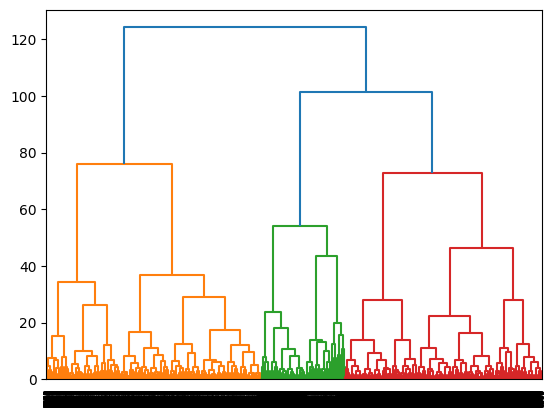

In [129]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
mergings = linkage(scaled_data, method='ward')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings)
plt.show()

In [130]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(scaled_data)
print(y_hc)

[1 1 1 ... 0 0 0]


In [131]:
cluster_labels = hc.labels_ 
cluster_labels = cluster_labels + 1

In [132]:

X = pd.DataFrame(scaled_data)
X = X.iloc[:,[0,1]]
print(X)

             0         1
0    -0.398778 -1.048746
1    -0.641954 -1.262001
2    -1.070885 -0.709940
3    -0.740525 -0.659524
4     0.009478 -1.242551
...        ...       ...
9995  0.564456  1.273401
9996 -0.201344  1.002740
9997  0.219037  0.487513
9998 -0.820588  1.383018
9999 -1.091760  1.090120

[10000 rows x 2 columns]


In [133]:

print(y_hc)

[1 1 1 ... 0 0 0]


In [134]:
selected_features['Cluster'] = cluster_labels

/var/folders/5z/ygf2gykn21s37gz20p2w7pwr0000gn/T/ipykernel_70022/2508034300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['Cluster'] = cluster_labels


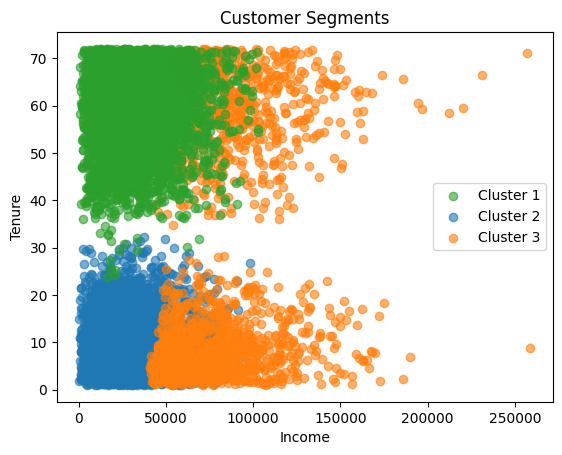

In [135]:
for label in selected_features['Cluster'].unique():
    subset = selected_features[selected_features['Cluster'] == label]
    plt.scatter(subset['Income'], subset['Tenure'], label=f'Cluster {label}', alpha=0.6)

plt.xlabel('Income')
plt.ylabel('Tenure')
plt.title('Customer Segments')

handles, labels = plt.gca().get_legend_handles_labels()
order = [labels.index("Cluster 1"), labels.index("Cluster 2"), labels.index("Cluster 3")]

plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order])
plt.show()

